<a href="https://colab.research.google.com/github/valki45/inteligencia-artificial/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# Entradas del problema XOR
# Cada fila representa un par (x1, x2)
# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Se crea una red neuronal secuencial
modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
# Se configura el modelo con el optimizador, la función de pérdida y la métrica
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Se entrena el modelo con los datos de entrada (X) y salida (y)
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


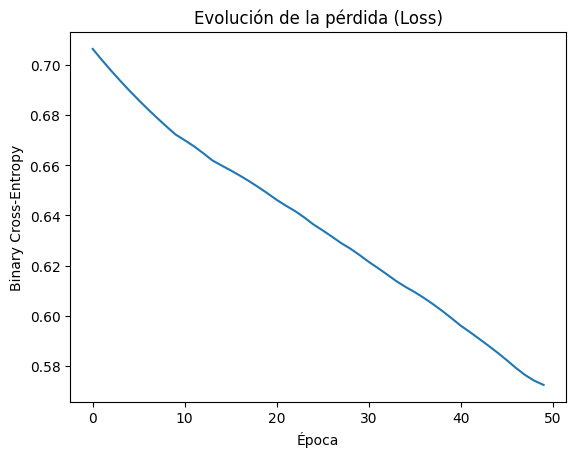

In [ ]:
import matplotlib.pyplot as plt
# Se grafica cómo cambió el error (loss) durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [ ]:
# Se calcula la pérdida (loss) y la precisión (accuracy) del modelo
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7500 - loss: 0.5700
Loss: 0.5699790716171265, Accuracy: 0.75


In [ ]:
# El modelo predice las salidas para cada entrada de X
# Si el valor es mayor que 0.5, se considera como 1; de lo contrario, 0
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[0 0] -> 0
[0 1] -> 0
[1 0] -> 1
[1 1] -> 0
